## House Rental Prediction

- Let's create a ML model to predict rent of house.
- Here is the data - Link
- Make sure you do data wrangling & get useful insights/visualizations
- Create models using Linear Regressions or variations of it
- Think harder about data preprocessing

### Import Libraries: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem statement:

- To predict the house rental price in our data and the data given with sqft, floor, total floor, bedroom, living room, bathroom and price(Target variable)
- Predicting Price of House using linear Regressions or variations of it

### Load the Dataset

In [2]:
data = pd.read_csv("house_rental_data.csv")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
data.nunique()

Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64

### Data Cleaning & Data Preprocessing & Data visulization:

In [8]:
# Check for missing values

data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

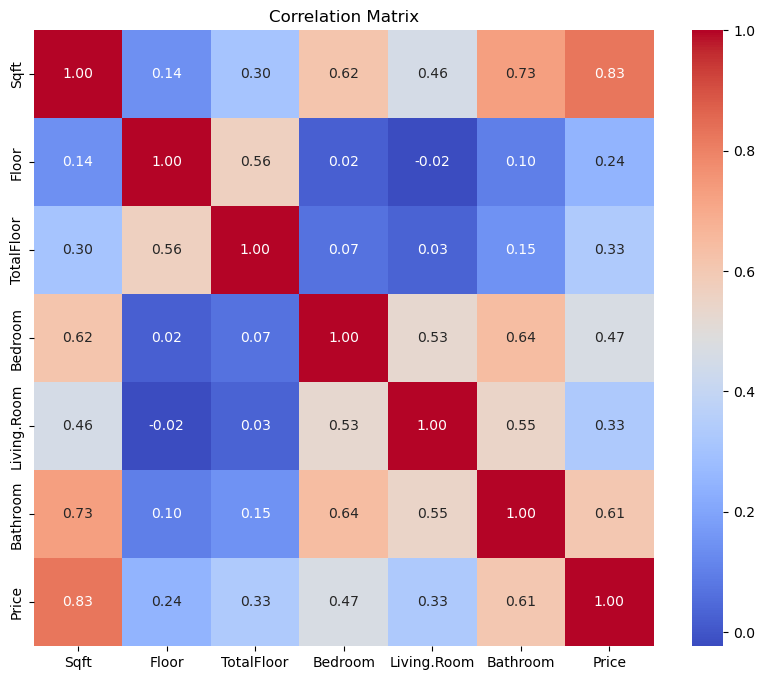

In [9]:
# Explore correlations between features and the target variable

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

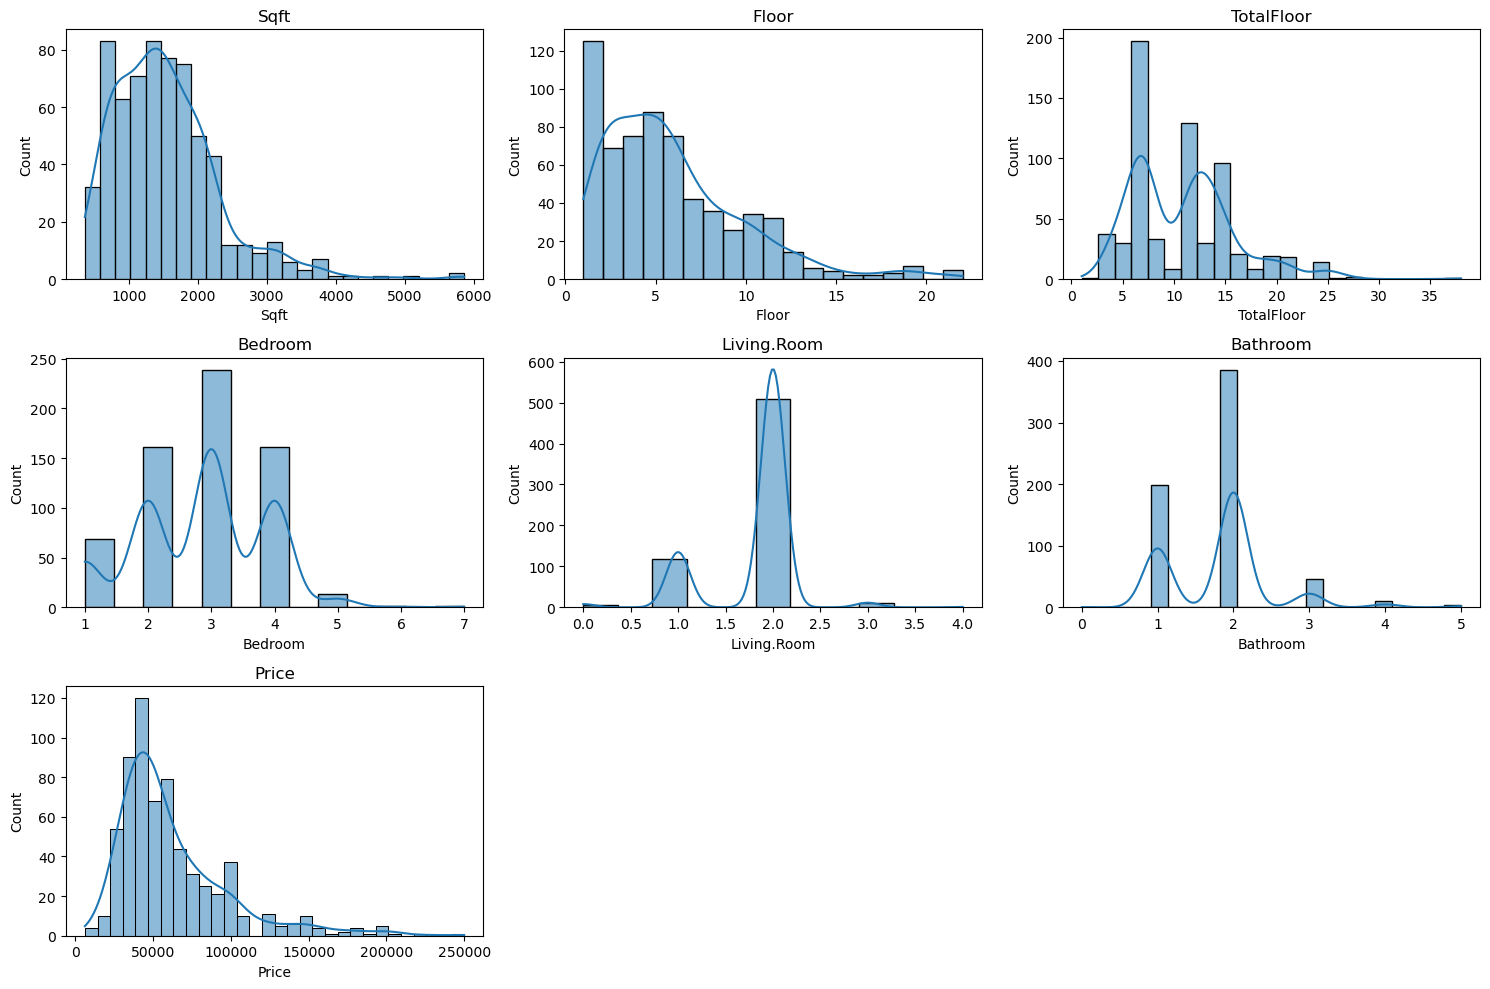

In [10]:
# Visualize distributions of numerical features

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

### Feature Selection/Engineering:

In [11]:
# Split data into features (X) and target variable (y)\

X = data.drop('Price', axis=1)
y = data['Price']

In [12]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection:

In [13]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions

y_pred = lr.predict(X_test)
y_pred

array([ 40792.80631354,  41987.98232034,  76834.19188275,  38178.37419571,
        72639.34958361,  66012.82867931,  79388.29513327,  74437.97594984,
        78070.90201018,  32285.48477587,  45950.30206877,  46581.96197779,
        33115.03387001,  34804.76096026,  29731.90042828,  80320.74596461,
        55256.39893687,  39578.99232574,  51943.42568404,  30509.83890297,
        52337.08735006,  45038.96208954,  44891.22014025, 167629.80355779,
       148600.77681758,  56876.99370249,  65839.6704845 ,  30640.34695988,
        20628.57806609,  56611.56163437,  56820.71340702,  81566.58292589,
        78777.00246954,  40080.86681056,  49709.38555799,  63182.29808758,
        83936.92085999,  70737.32545278,  58453.4959207 ,  83600.2752391 ,
        67275.87855884, 142443.14697108,  83671.0413575 ,  81864.58054413,
        58734.8550193 ,  43954.93352594,  37503.09660952,  30962.25666701,
        57731.84965648,  34665.05986077,  57361.38533053,  78070.90201018,
       158065.27897494,  

In [16]:
# Evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [17]:
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"r2_score: {r2_score}")
print(f"Root Mean Squared Error: {rmse}")


Model Evaluation:
Mean Absolute Error: 13545.889261601762
Mean Squared Error: 401487570.46258795
r2_score: 0.7202087278032021
Root Mean Squared Error: 20037.154749679106


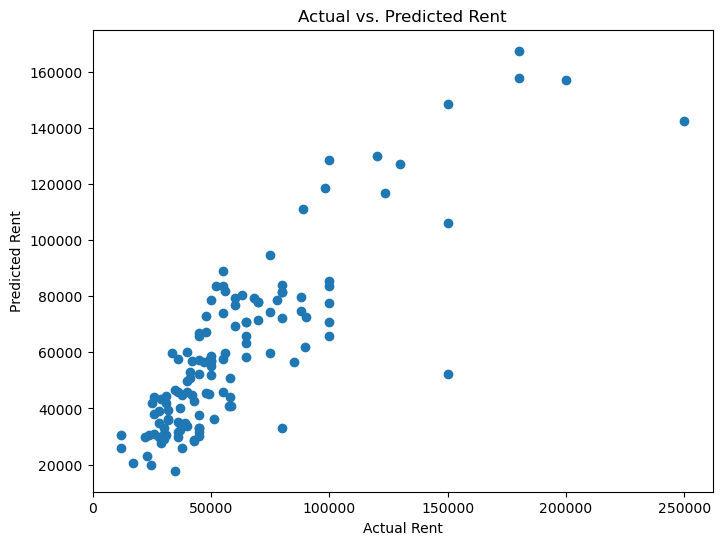

In [19]:
# Visualize actual vs. predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs. Predicted Rent")
plt.show()

In [21]:
# Interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print("\nCoefficients:")
print(coefficients)


Coefficients:
       Feature  Coefficient
0         Sqft    36.610200
1        Floor   986.524136
2   TotalFloor   167.851171
3      Bedroom  -784.235214
4  Living.Room -3279.989826
5     Bathroom  2798.765642
